# Simulation of Reaction-Diffusion Equation

## Introduction

From the spots on a jaguar's fur to the shapes found in a seashell, patterns can be found almost everywhere in nature. Pattern-formation and the mechanism behind this visible result of self-organization has long been the subject of interest in various fields of science, may it be on physics, materials science or biology [1]. From such interest in these fields, various mathematical models have been developed to describe the mechanism of pattern-formation, one of which are Reaction-diffusion equations. This model describes a system with many interacting components and which have two competing processes. This competing process can be the inhibition of the diffusion of some material A, by another material B [2]. 
<br> The field of pattern formation were also delved upon by the scientist Alan Turing, in his paper "The Chemical Basis of Morphogenesis". His paper first introduced his theory of morphogenesis, which explains how the pattern formation found in nature is facilitated by a system of chemical substances named "morphogens". Through instability of the homogenous equilibrium, pattern would soon form even if the system is initially homogenous [3]. This paper considers this system as a reaction-diffusion system, governed by the reaction diffusion equation given below,

\begin{equation}
\frac{du}{dt} = D \frac{d^2 u}{dx^2} + f(u)
\end{equation}

This notebook aims to explore the reaction-diffusion equation through simulating it using the Gray-Scott model [4]. Furthermore, this aims to determine the effect of adjusting different parameters on the reaction-diffusion equation to the generated pattern by the system. Lastly, this aims to replicate a pattern found in real-world through the finding the appropriate values for the parameters of the reaction-diffusion equation.

## Theory

For this simulation, we'll be using the Gray-Scott Model given in the equation below,

$$
\begin{align}
A_{ij}(t+1) &= A_{ij}(t) + \Big[D_A (\nabla^2 A)_{ij} - A_{ij}B_{ij}^2 + f(1-A_{ij}) \Big]\times\Delta t\\
B_{ij}(t+1) &= B_{ij}(t) + \Big[D_B (\nabla^2 B)_{ij} + A_{ij}B_{ij}^2 - (k+f)B_{ij} \Big]\times\Delta t
\end{align}
$$


## Code

#### Discretizing the Laplacian

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl

A = np.ones((3,3))
A[1,1] = 0

right_neighbor = np.roll(A, # the matrix to permute
                         (0,-1), # we want the right neighbor, so we shift the whole matrix -1 in the x-direction)
                         (0,1), # apply this in directions (y,x)
                        )
right_neighbor

def discrete_laplacian(M):
    """Get the discrete Laplacian of matrix M"""
    L = -4*M
    L += np.roll(M, (0,-1), (0,1)) # right neighbor
    L += np.roll(M, (0,+1), (0,1)) # left neighbor
    L += np.roll(M, (-1,0), (0,1)) # top neighbor
    L += np.roll(M, (+1,0), (0,1)) # bottom neighbor
    
    return L

In [2]:
#testing the function created to discretize the Laplacian
discrete_laplacian(A)

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]])

#### Implementing the update formula

The update formula is given by,

$$
(\nabla^2 A)_{ij} = A_{i,j-1} + A_{i,j+1} + A_{i-1,j} + A_{i+1,j} - 4A_{ij}
$$

We now try implementing this in python using a function

In [3]:
def gray_scott_update(A, B, DA, DB, f, k, delta_t):
    """
    Updates a concentration configuration according to a Gray-Scott model
    with diffusion coefficients DA and DB, as well as feed rate f and
    kill rate k.
    """
    
    # Let's get the discrete Laplacians first
    LA = discrete_laplacian(A)
    LB = discrete_laplacian(B)
    
    # Now apply the update formula
    diff_A = (DA*LA - A*B**2 + f*(1-A)) * delta_t
    diff_B = (DB*LB + A*B**2 - (k+f)*B) * delta_t
    
    A += diff_A
    B += diff_B
    
    return A, B

#### Initializing conditions for the Reaction-Diffusion Equation

In [4]:
def get_initial_configuration(N, random_influence=0.2):
    """
    Initialize a concentration configuration. N is the side length
    of the (N x N)-sized grid.
    `random_influence` describes how much noise is added.
    """
    
    # We start with a configuration where on every grid cell 
    # there's a lot of chemical A, so the concentration is high
    A = (1-random_influence) * np.ones((N,N)) + random_influence * np.random.random((N,N))
    
    # Let's assume there's only a bit of B everywhere
    B = random_influence * np.random.random((N,N))
    
    # Now let's add a disturbance in the center
    N2 = N//2
    radius = r = int(N/10.0)
    
    A[N2-r:N2+r, N2-r:N2+r] = 0.50
    B[N2-r:N2+r, N2-r:N2+r] = 0.25
    
    return A, B

#### Function to display the generated pattern

In [5]:
def draw(A,B):
    """draw the concentrations"""
    fig, ax = pl.subplots(1,2,figsize=(5.65,4))
    ax[0].imshow(A, cmap='Greys')
    ax[1].imshow(B, cmap='Greys')
    ax[0].set_title('A')
    ax[1].set_title('B')
    ax[0].axis('off')
    ax[1].axis('off')

### Defining the initial values of various parameters

In [6]:
# update in time
delta_t = 1.0

# Diffusion coefficients
DA = 0.16
DB = 0.08

# define feed/kill rates
f = 0.060
k = 0.062

# grid size
N = 200

# simulation steps
N_simulation_steps = 10000

## Effect of parameter variation on the pattern generated by a reaction-diffusion system

At this section of this notebook, the parameters in the Gray-Scott model is tweaked to determine its effect on the pattern generated by the system. Four parameters were considered namely, the diffusion coefficients for each chemical, DA and DB and kill rates f and k.

### Varying the parameter f

<IPython.core.display.Javascript object>


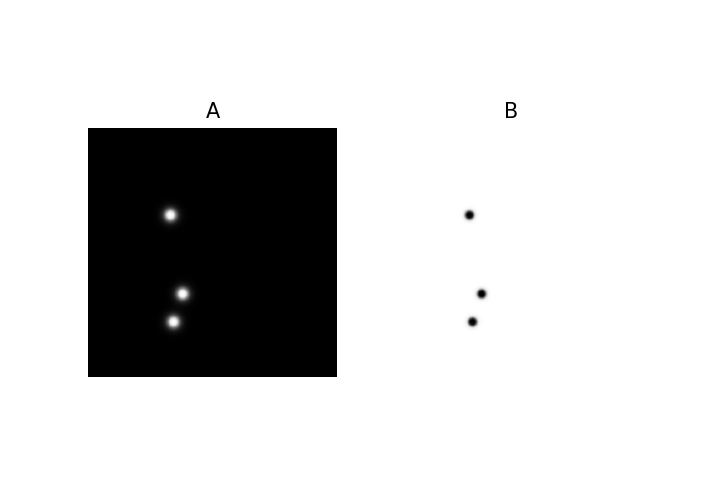

<IPython.core.display.Javascript object>


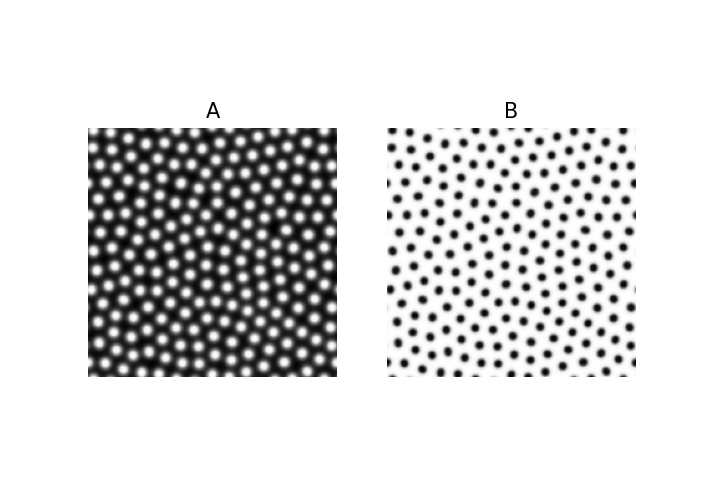

<IPython.core.display.Javascript object>


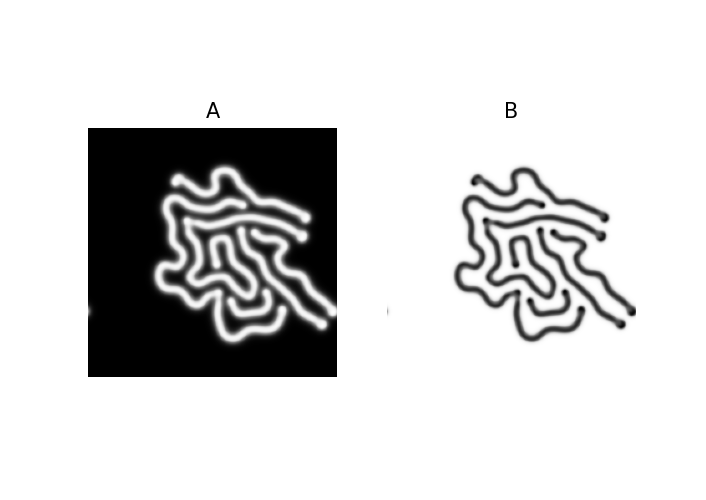

<IPython.core.display.Javascript object>


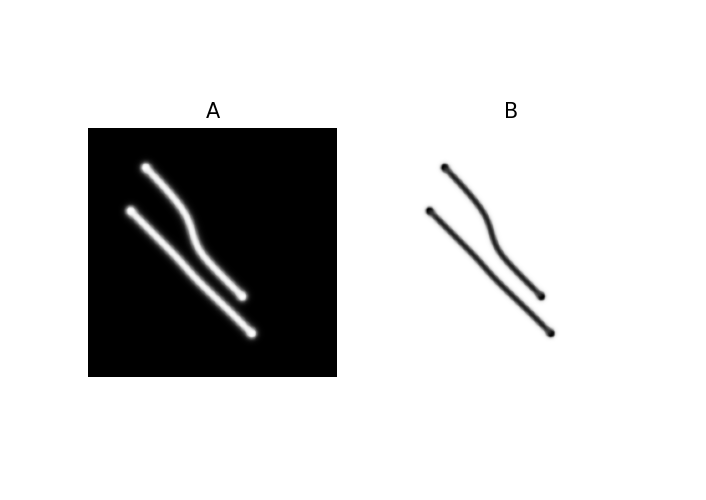

In [13]:
f = 0.026
A, B = get_initial_configuration(200)
for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

f = 0.030
A, B = get_initial_configuration(200)
for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

f = 0.050
A, B = get_initial_configuration(200)
for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

f = 0.062
A, B = get_initial_configuration(200)
for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

As was mentioned, the reaction-diffusion equation describes a system with two competing processes. In the Gray-scott model, the parameters f for feed and k for kill facilitates that competing process. In figures 1 to 4, the parameter f was set to 0.026, 0.030, 0.040 and 0.050 respectively. This parameter dictates the rate at which the substance A is replenished. 

From figure 1, it can be observed that most of the region is dominated by substance A, since compared to the parameter k, which is attributed to the rate at which substance B is removed from the system, the value of k here is lower. Hence, there are only fewer substance B clustered into circular regions as compared to substance A. In figure 2, the value of f is almost half of the value of the parameter k, in this parameters, substance B would tend to cluster into dots spread almost uniformly on the system. Comparably, these small circular regions of substance B is greater in number than in figure 1, this could be attributed to the increased value of f, hence substance A is replenished more frequently, which is then used to produce substance B resulting to these observed greater number of substance B circular regions.

Increasing the parameter's value to f=0.050, it can be observed in figure 3 that from these small clustered circular areas, the pattern of substance B becomes elongated wire-like figures. This might be due to the frequency of replenishing substance A being comparable to the rate at which substance B is removed. At figure 4 above, it can be observe that at equal value of the feed and kill rate, the pattern generated by substance B is the similar wire-like structures, but is lesser in quantity.

### Varying the parameter k

<IPython.core.display.Javascript object>


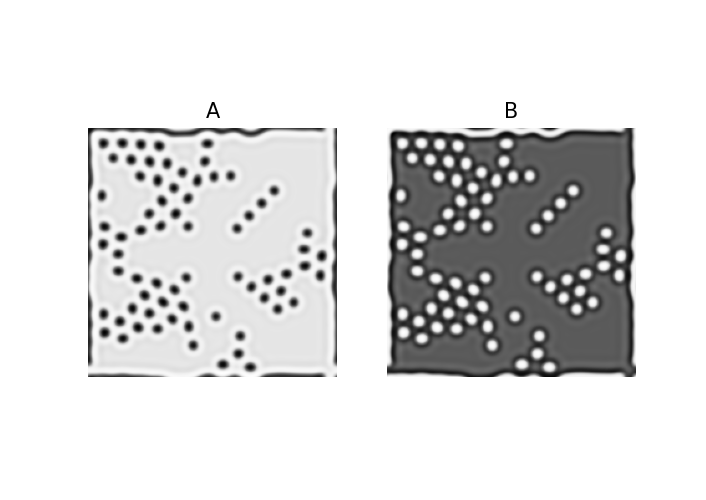

<IPython.core.display.Javascript object>


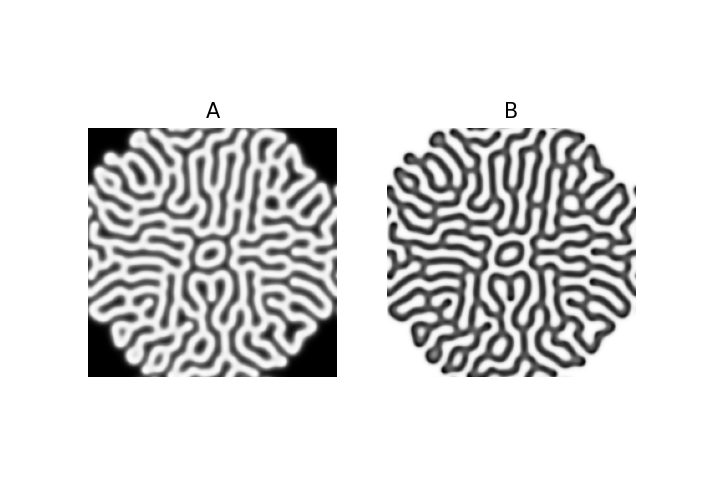

<IPython.core.display.Javascript object>


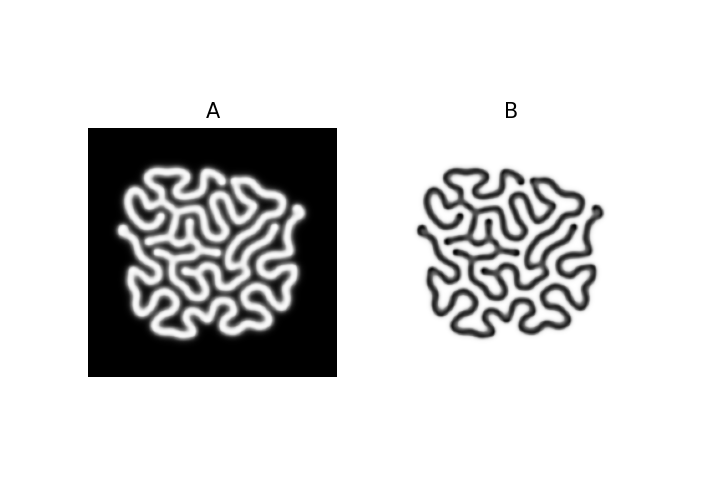

<IPython.core.display.Javascript object>


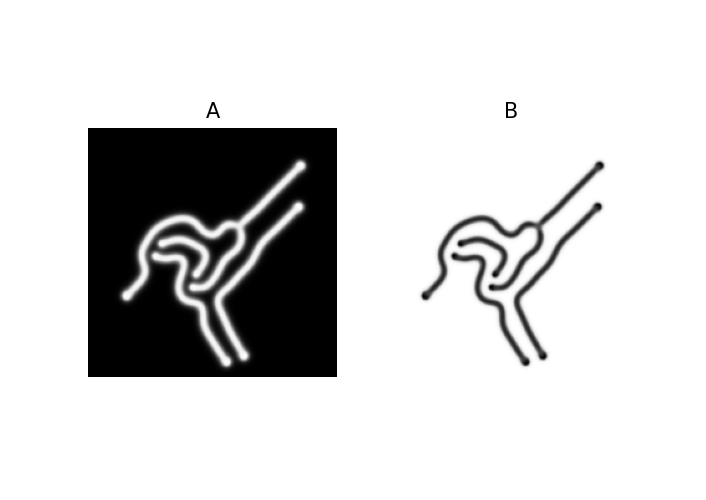

In [14]:
f = 0.060

k = 0.061
A, B = get_initial_configuration(200)
for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

k = 0.062
A, B = get_initial_configuration(200)

for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

k = 0.063
A, B = get_initial_configuration(200)
for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

k = 0.064
A, B = get_initial_configuration(200)

for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

In this section, the effect of adjusting the parameter k was explored. Figures 5 to 8 shows the generated pattern of the system with k values of k=0.061 to 0.064, with 0.001 increment per figure. In figure 4, the system is dominated by substance B, and it is observe that substance forms these small circular clusters. This pattern can be explained due to the relatively slow rate of removing substance B from the systems which then allowed it to persist and consume substance A, which is how it forms, resulting to it dominating the system. In figure 14, a more interesting pattern is formed by the system. At these parameter values, substance B forms a root-like networks that spreads radially outward. At higher value of the kill rate, such as in figure 7 and 8, the spread of this root-like networks seems to be subjugated which can be seen more clearly if we compare figure 6 to 7, wherein this radius where this root-like network pattern formed by substance B is smaller in figure 7 with higher kill rate than figure 6 with relatively slower kill rate.

### Modeling Real-World Pattern through the Reaction-Diffusion equation

From the earlier discussion it is mentioned that reaction-diffusion equation attempts to model pattern formation in the natural world. This section would then demonstrate how natural pattern can be modeled by this equation. From the variation of parameters in the gray-scott equation, the pattern on a pufferfish was attempted to be recreated in the figure below.

<img src="https://www.researchgate.net/publication/359076138/figure/fig1/AS:1133976806789122@1647372547659/A-Detail-of-skin-pattern-of-a-giant-pufferfish-which-bears-resemblance-to-B-B-A.jpg" width="500"/>|


<IPython.core.display.Javascript object>


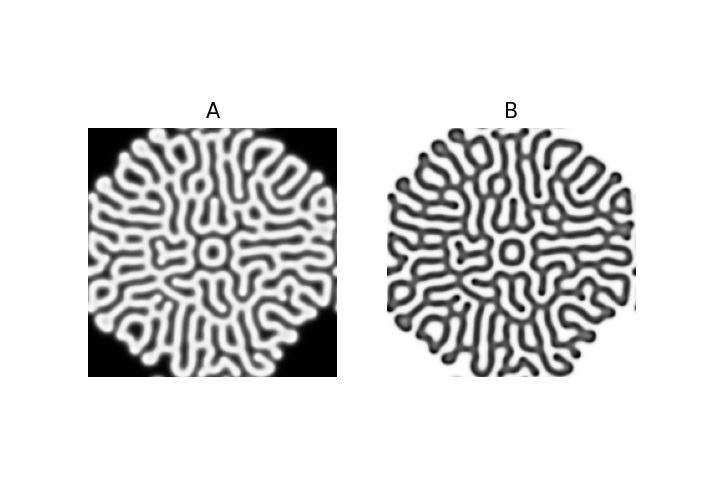

In [31]:
# update in time
delta_t = 1.0

# Diffusion coefficients
DA = 0.16
DB = 0.08

# define feed/kill rates
f = 0.061
k = 0.062

# grid size
N = 200

# simulation steps
N_simulation_steps = 10000
A, B = get_initial_configuration(200)

for t in range(N_simulation_steps):
    A, B = gray_scott_update(A, B, DA, DB, f, k, delta_t)
    
draw(A,B)

#### References:
[1] Nabika, Hideki, Masaki Itatani, and István Lagzi. "Pattern formation in precipitation reactions: The Liesegang phenomenon." Langmuir 36.2 (2019): 481-497.
<br> [2] NHobbs, Bruce E., and Alison Ord. Structural geology: the mechanics of deforming metamorphic rocks. Elsevier, 2014.
<br> [3] Turing, Alan Mathison. "The chemical basis of morphogenesis." Bulletin of mathematical biology 52.1-2 (1990): 153-197.
<br> [4] Benmaier. “Reaction-Diffusion/gray_scott.Ipynb at Master · Benmaier/Reaction-Diffusion.” GitHub, https://github.com/benmaier/reaction-diffusion/blob/master/gray_scott.ipynb. 